In [15]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
from cifar_data import get_data_set 
from matplotlib import pyplot as plt
import tensorflow as tf
import time
from sklearn.model_selection import train_test_split
import scipy.misc
from skimage.transform import resize
import cv2

In [16]:

#Getting train and test set
train_instances, train_label, categories = get_data_set(cifar=10)
test_instances, test_label, categories = get_data_set(name="test", cifar=10)

In [17]:
print('Cifar Train Data # instances:',train_instances.shape[0])
print('Cifar Test Label # attributes:',test_instances.shape[0])
print('Cifar Data # attributes:',train_instances.shape[1])
print('Cifar Label # attributes:',train_label.shape[1])
print('Cifar Categories attributes:',categories)

Cifar Train Data # instances: 50000
Cifar Test Label # attributes: 10000
Cifar Data # attributes: 3072
Cifar Label # attributes: 10
Cifar Categories attributes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


label:  truck


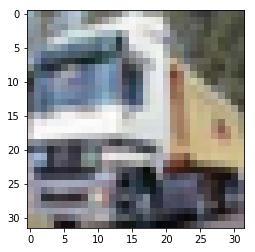

In [18]:
i=1
print('label: ', categories[np.argmax(train_label[i])] )
#1-D to 2-D
img = train_instances[i].reshape(32, 32, 3)  
plt.imshow(img)
plt.show() 

In [19]:
def takeRandomSamples(labels,dataset):
    
    #fig = plt.figure(figsize=(32,32))
    for i in range(len(labels)):
        #ax = fig.add_subplot(10, 1, 1 + i, xticks=[], yticks=[])
        counter=0
        for label in train_label:
           
            if np.argmax(label) == i:
                #ax.set_title(labels[i])
                img = dataset[counter].reshape(32, 32, 3)  
                img=resize(img, (200, 200, 3)).astype('float32')

                scipy.misc.imsave('samples/{}.jpg'.format(labels[i]), img)
                #plt.imshow(img)
                break
            counter=counter+1      
    #plt.show()    
    

In [20]:
def calculateHistograms(filepath):
    
    
    samples =glob(filepath)
    
    fig = plt.figure(figsize=(64,64))
    counter=0
    for sample in samples:

        img = cv2.imread(sample)
        chans = cv2.split(img)
        colors = ("b", "g", "r")
        plt.figure()
        plt.title(sample)
        plt.xlabel("Bins")
        plt.ylabel("# of Pixels")
        features = []
     
         # loop over the image channels
        for (chan, color) in zip(chans, colors):
            hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
            features.extend(hist)
            plt.plot(hist, color = color)
            plt.xlim([0, 256])
            path=sample.split('/', 1 )
        print(path)
        plt.savefig('{}/hist_{}'.format(path[0],path[1])) 








In [21]:
takeRandomSamples(categories,train_instances)

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


['samples', 'dog.jpg']
['samples', 'horse.jpg']
['samples', 'hist_bird.jpg']
['samples', 'hist_dog.jpg']
['samples', 'ship.jpg']
['samples', 'deer.jpg']
['samples', 'hist_airplane.jpg']
['samples', 'bird.jpg']
['samples', 'automobile.jpg']
['samples', 'hist_deer.jpg']
['samples', 'hist_horse.jpg']
['samples', 'hist_ship.jpg']
['samples', 'airplane.jpg']
['samples', 'cat.jpg']
['samples', 'frog.jpg']
['samples', 'hist_truck.jpg']
['samples', 'hist_automobile.jpg']
['samples', 'hist_cat.jpg']
['samples', 'truck.jpg']
['samples', 'hist_frog.jpg']


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


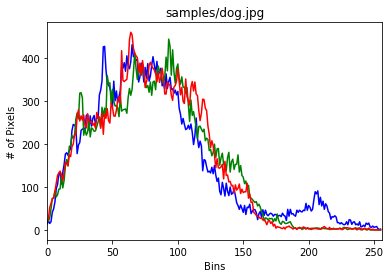

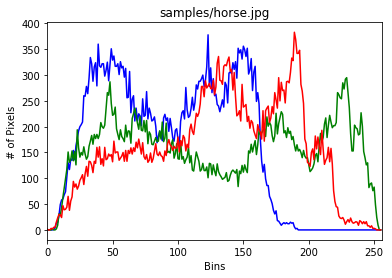

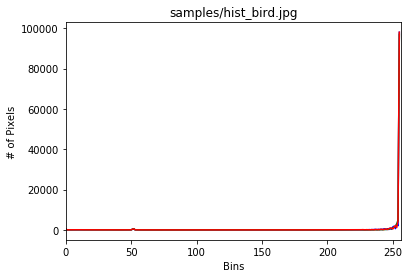

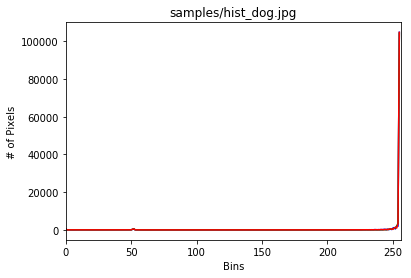

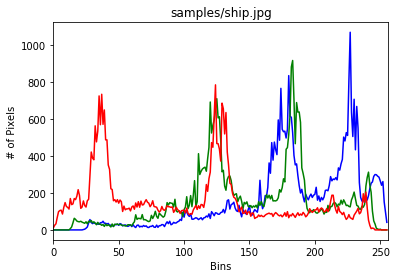

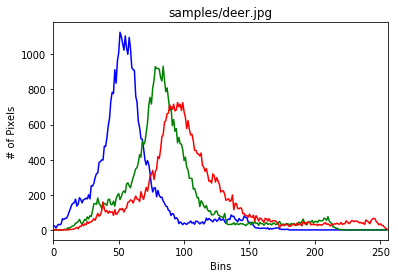

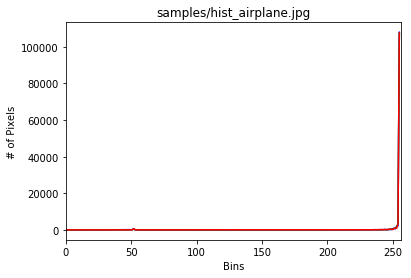

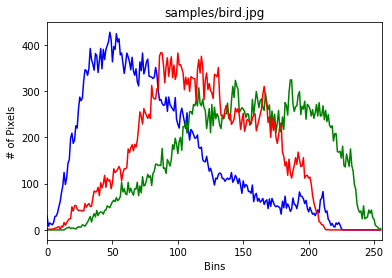

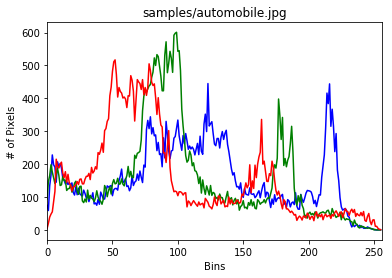

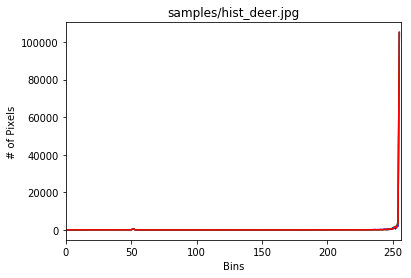

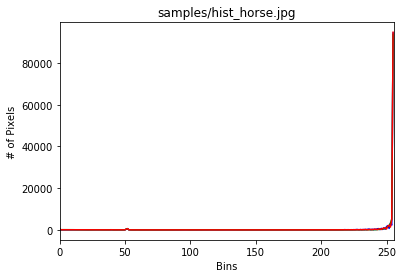

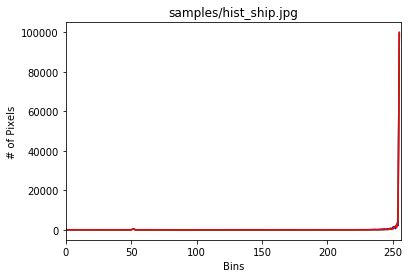

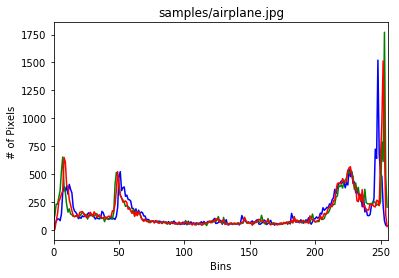

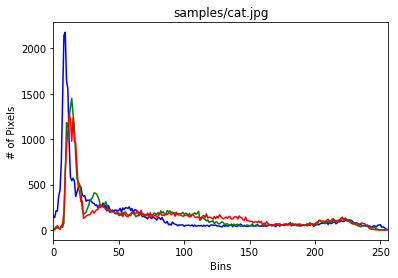

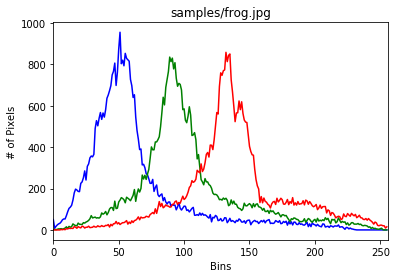

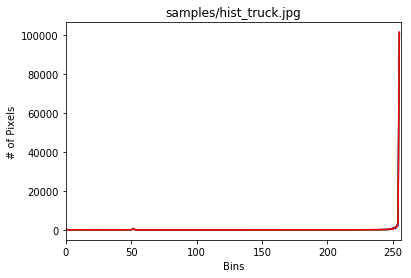

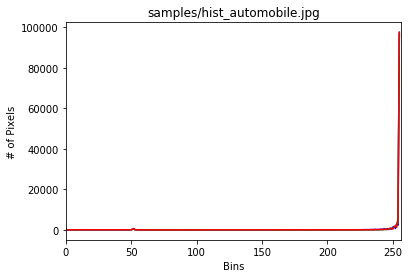

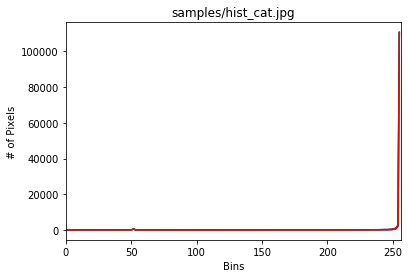

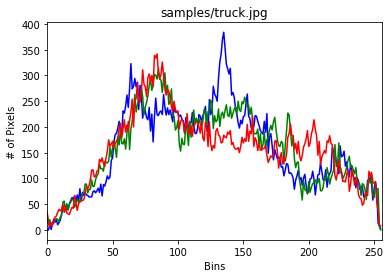

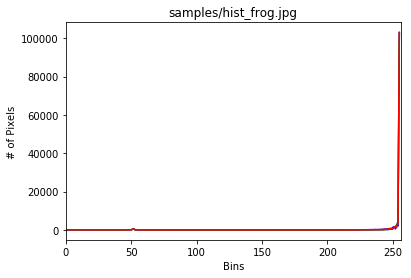

In [22]:
calculateHistograms('samples/*')

In [23]:
from keras.preprocessing import image                  
from tqdm import tqdm
def reshapeInstance(instance):
        reshaped_instance=np.expand_dims(instance.reshape(32, 32, 3) , axis=0)
        return reshaped_instance


def reshapeInstances(instances):
    list_of_tensors = [reshapeInstance(instance) for instance in tqdm(instances)]
    return np.vstack(list_of_tensors)

In [24]:
print('Preprocessing......')
print('Resphaping to (1, 32, 32, 3)')
#Reshaping cifar data 1-d array to 2-D matrix witj 3 channes
train_instances_reshaped=reshapeInstances(train_instances)       
test_instances_reshaped=reshapeInstances(test_instances)


100%|██████████| 50000/50000 [00:00<00:00, 382271.33it/s]

Preprocessing......
Resphaping to (1, 32, 32, 3)



100%|██████████| 10000/10000 [00:00<00:00, 411722.95it/s]


In [25]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

input_dims = (train_instances_reshaped.shape)[1:]
model = Sequential()
#building arch 1
#model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_dims))              
#model.add(MaxPooling2D(pool_size=2))
#model.add(Flatten())
#model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(10, activation='softmax'))
#model.summary()

#building arch 2.
#model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_dims))              
#model.add(MaxPooling2D(pool_size=2))
#model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=input_dims))              
#model.add(MaxPooling2D(pool_size=2))
#model.add(Flatten())
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(10, activation='softmax'))
#model.summary()


#building arch 3.
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_dims))              
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=input_dims))              
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()







_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
__________

In [26]:
#Compiling Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
from keras.callbacks import ModelCheckpoint  
import matplotlib.pyplot as plt


checkpointer = ModelCheckpoint(filepath='weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

#Batch size 50
#Epochs 20
#Validation Set %20
model_history=model.fit(train_instances_reshaped, train_label, batch_size=50, epochs=20,
          validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)




Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 72s 2ms/step - loss: 1.5316 - acc: 0.4357 - val_loss: 1.1501 - val_acc: 0.5922

Epoch 00001: val_loss improved from inf to 1.15012, saving model to weights.best.from_scratch.hdf5
Epoch 2/20
40000/40000 [==============================] - 107s 3ms/step - loss: 1.1427 - acc: 0.5933 - val_loss: 0.9926 - val_acc: 0.6554

Epoch 00002: val_loss improved from 1.15012 to 0.99264, saving model to weights.best.from_scratch.hdf5
Epoch 3/20
40000/40000 [==============================] - 117s 3ms/step - loss: 0.9704 - acc: 0.6607 - val_loss: 0.9551 - val_acc: 0.6665

Epoch 00003: val_loss improved from 0.99264 to 0.95510, saving model to weights.best.from_scratch.hdf5
Epoch 4/20
40000/40000 [==============================] - 109s 3ms/step - loss: 0.8543 - acc: 0.6987 - val_loss: 0.8945 - val_acc: 0.6912

Epoch 00004: val_loss improved from 0.95510 to 0.89450, saving model to weights.best.from_

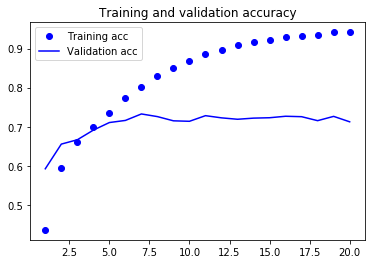

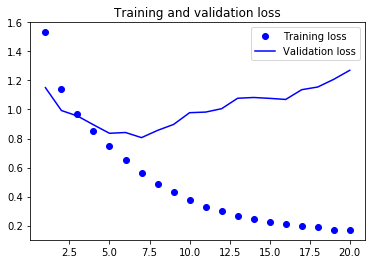

In [28]:
# Plotting
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [79]:
model.load_weights('weights.best.from_scratch.hdf5')


In [80]:
# get index of predicted dog breed for each image in test set
predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_instances_reshaped]

# report test accuracy
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_label, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 72.4000%
